# Úkol č. 2 - Využití shlukování pro počítání objektů na obrázku
  * **Deadline je do 22. listopadu 23:59.** Pokud odevzdáte úkol do 29. listopadu 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte vhodným způsobem vybírat příznaky pro shlukovací algoritmy. Někdy je vhodné použít barevnou reprezentaci obrázku (RGB nebo spíše HSV), jindy je lepší použít souřadnice pixelů v obrázku.
  * Samozřejmě existují mnohem pokročilejší nástroje pro segmentaci objektů na obrázku, které jsou dostupné v různých knihovnách, ale tady nám jde o to vyzkoušet si na jednoduché úloze aplikaci základních shlukovacích metod.
  * Vaším cílem je využít algoritmus **KMeans a hierarchické aglomerativní shlukování** k tomu, abyste vytvořili jednoduchý kód, který, když na vstupu dostane obrázek z dané sady, dokáže vrátit **počet objektů**, které se na obrázku vyskytují.
  
  
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat
Budeme pracovat s obrázky, které jsou uložené v podadresáři `data` a originálně pocházejí z datasetu [CLEVR](https://cs.stanford.edu/people/jcjohns/clevr/). Na těchto obrázcích jsou různě rozmístěné barevné objekty na šedém pozadí.

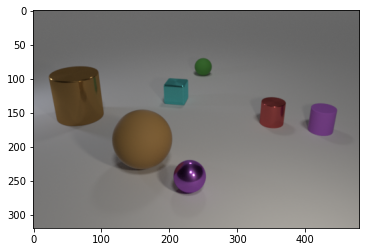

In [ ]:
# Ukázka jednoho z obrázků
from PIL import Image
from matplotlib import pyplot as plt

with Image.open("data/CLEVR_test_001109.png").convert('RGB') as image:
    plt.imshow(image)

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
- Vezměte libovolný obrázek z datasetu (pro začátek doporučuji nějaký, kde jsou objekty spíše dál od sebe), načtěte ho a zobrazte.
- Převeďte ho do `numpy` array, která pak přeskupte (reshape) do pole bodů v prostoru RGB, tj. do tvaru `(počet bodů, 3)`.
- V tomto barevném příznakovém prostoru zkuste provést shlukování (vyberte vhodný algoritmus na základě velikosti a charakteru dat) a diskutujte výsledky (které asi nebudou nic moc).
- Zkuste příznaky obohatit o prostorové souřadnice (k tomu využijte numpy funkci `meshgrid` s parametrem `indexing='ij'` a také funkci `concatenate`, která umožní připojení k obrázkovým datům). Jako výstup tohoto kroku byste měli mít pole ve tvaru `(počet bodů, 5)`, kde první 3 příznaky odpovídají barvám a zbylé dva souřadnicím každého z pixelů.
- V tomto obohaceném příznakovém prostoru znovu zkuste shlukování a diskutujte výsledky (které asi opět nebudou nic moc).
- Nyní to celé zkusíme znovu, ale po načtení a zobrazení si obrázek převedeme do barevné reprezentace HSV. V první fázi si tedy obrázek načtěte do HSV reprezentace (balíček PIL na to má metodu `convert("HSV")`).
- Dále v tomto novém barevném prostoru proveďte shlukování pomocí KMeans a vhodným výběrem shluků (koukejte na saturation příznak) si odseparujte barevné objekty od pozadí (bez jejich odlišení - to provedeme později).
Dostanete něco takového: 

![title](./mask_of_objects.png)
- Když už máme objekty odseparované od pozadí (použijte logickou masku pro filtrování array, kterou si vytvoříte v předchozím kroku), budeme dále pracovat pouze s odpovídajícími pixely (pozadí už ne bereme). 
- Nyní si pro tyto pixely vytvoříme reprezentaci pomocí jejich souřadnic v původním obrázku (použijeme výše zmíněný `meshgrid` a také logickou masku).
- V tomto souřadnicovém prostoru proveďte vhodné shlukování, aby došlo ke správnému odseparování předmětů.
Finální výstup by měl vypadat nějak takto:

![title](./final_output.png)
- Diskutujte úskalí navrženého postupu a jeho univerzálnost pro počítání objektů na libovolném pozadí resp. částečně se překrývajících objektů. 

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
- (až +4 body) Polaďte algoritmus tak, aby pro téměř libovolný vstup z dané datové sady vypsal správný počet objektů a odseparoval je tak, jak je zobrazeno výše. K tomu je třeba správně zvolit shlukovací algoritmus v posledním kroku a také kritérium pro automatickou detekci správného počtu shluků. Diskutujte Váš postup.
- (až +4 body) Poslední shlukování pro odseparování předmětů jsme dělali pouze v souřadnicovém prostoru. Zkuste experimentovat s reprezentací v prostoru, kde jsou zkombinovány jak barevné tak i souřadnicové příznaky (s různými váhami mezi oběma skupinami). Cílem je opět automatická detekce počtu objektů pro libovolný vstup z dané datové sady. Diskutujte Váš postup a případné výhody tohoto přístupu, ve kterém se kombinují oba typy příznaků.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [ ]:
### odtud už je to Vaše
from matplotlib.image import imread
from sklearn.cluster import KMeans
#from sklearn.cluster import DBSCAN
from matplotlib.colors import to_hex
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from PIL import Image
import pandas as pd
import numpy as np
import colorsys
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
#reference answers for evaluation
ref_ans = [5, 3, 3, 4, 3, 3, 3, 5, 3, 4, 6, 4, 5, 3, 4, 5, 4, 3, 
           3, 3, 3, 7, 6, 3, 3, 3, 3, 3, 4, 5] 

#function reads image
def read_image(path, type): 
    img = Image.open(path).convert(type)
    img.show()
    return img

#function reshapes image to ndarray 1pix == 1row (rgb)
def reshape(img, number_of_columns):
    w, h = img.size
    img_array = np.reshape(img, (w*h, number_of_columns))
    #print(img_array)
    return img_array

#funtion calcutates silhouette score for 2 to 10 clusters and returns max
def calculate_max_silhouette_score(X):
    scores = []
    for n_clusters in range(2, 10):
        kmeans = KMeans(n_clusters=n_clusters).fit(X)
        score = silhouette_score(X, kmeans.labels_, sample_size=10000)
        scores.append(score)
        print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    max = np.argmax(scores) + 2
    print("Optimal number of clusters", max)
    return max

# mesgriding image
def perform_meshgrid(array, w, h):
    #w, h = img.size
    x, y = np.meshgrid(range(w), range(h))

    coordinate = np.concatenate([array, x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)
    #print(coordinate)
    return coordinate

#kmeans and returns array in original shape
def perform_kmeans(X, clusters):
    kmeans = KMeans(n_clusters=clusters, n_init=10, max_iter=300, random_state=1).fit(X)
    #centers = kmeans.cluster_centers_
    #centers = np.uint8(centers)
    #labels = kmeans.labels_
    #res = np.take(centers, labels, axis=0)
    return kmeans.labels_;

def delete_coords(array):
    new_arr = np.delete(coordinate, [3, 4], 1)
    #print(new_arr)
    return new_arr

#restores image
def restore_image(restored, shape):
    image = restored.reshape((shape[1], shape[0], -3))
    plt.imshow(image);
    plt.show()
    return image

1. pokus o zistenie poctu objektov.
* Pouzijeme iba cisto farby

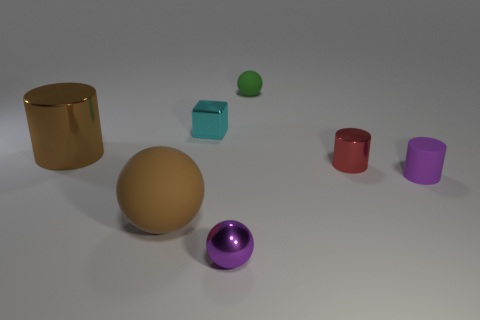

In [ ]:
img = read_image("data/CLEVR_test_001109.png", "RGB");
img_array = reshape(img, 3);

In [ ]:
max_score = calculate_max_silhouette_score(img_array)

For n_clusters = 2, silhouette score is 0.6706999848948166)
For n_clusters = 3, silhouette score is 0.5361228232296701)
For n_clusters = 4, silhouette score is 0.5862051078347408)
For n_clusters = 5, silhouette score is 0.6037385484869017)
For n_clusters = 6, silhouette score is 0.5952185842731254)
For n_clusters = 7, silhouette score is 0.6098285403997858)
For n_clusters = 8, silhouette score is 0.566559921247251)
For n_clusters = 9, silhouette score is 0.5640706735309614)
Optimal number of clusters 2


* Vidime ze ze optimalny pocet objektov je podla nasej predpovede 2 co nesedi z realitou.
* Skusime si vyplotovat obrazok

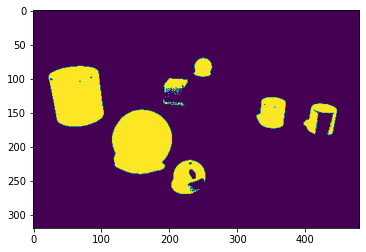

In [ ]:
labels = perform_kmeans(img_array, max_score)
plt.imshow(labels.reshape(320, 480,1))
plt.show()

* Podla obrazku vidime ze pozadie malo velky vplyv na farbu.
* Mozeme vidiet obrysy objektov

* 2. pokus 
* skusime pridat suradnice do pola (1 pix = r,g,b,x,y)

In [ ]:
coordinate = perform_meshgrid(img_array, img.size[1], img.size[0])

In [ ]:
max_score = calculate_max_silhouette_score(coordinate)

For n_clusters = 2, silhouette score is 0.4184028668775192)
For n_clusters = 3, silhouette score is 0.3694929709920961)
For n_clusters = 4, silhouette score is 0.34284451973358515)
For n_clusters = 5, silhouette score is 0.3492868300755589)
For n_clusters = 6, silhouette score is 0.34075503758586695)
For n_clusters = 7, silhouette score is 0.3246051685195442)
For n_clusters = 8, silhouette score is 0.3085993708754104)
For n_clusters = 9, silhouette score is 0.3240685912578113)
Optimal number of clusters 2


* Vidime ze nas algoritmus stale vracia vysledok 2.
* Pozrime sa znova na obrazok

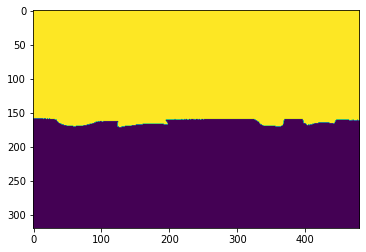

In [ ]:
labels = perform_kmeans(coordinate, max_score)
plt.imshow(labels.reshape(320, 480,1))
plt.show()

* Vysledny obrazok sa zmenil, pocet slhlukov ktory vysiel z algoritmu ostal rovnaky.
* Obrazok bol rozdeleny na 2 polky to je vysledkom suradnic ktore su rozdelene rovnomerne po obrazku. Male nezrovnalosti v strede su sposobene farbou obrazkov
* Zmenilo sa skore ktore vyslo pre jednotlive pocty objektob

* 3. pokus
* Obrazok si rozdelime na 2 casti (pozadie a objekty) pomocou saturacie obrazku v HSV.

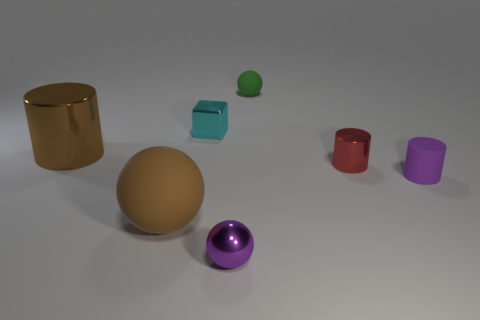

In [ ]:
img_hsv = read_image("data/CLEVR_test_001109.png", "HSV")
img_array_hsv = reshape(img_hsv, 3)

In [ ]:
def cut_saturation(img_array, img):
    w, h = img.size
    sat = img_array[:,1]
    #print(img_array)
    #print(sat)
    sat = sat.reshape(-1,1)
    return sat
sat = cut_saturation(img_array_hsv, img_hsv)
labels = perform_kmeans(sat, 2)

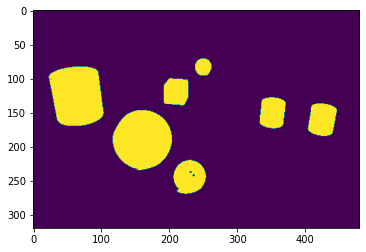

In [ ]:
plt.imshow(labels.reshape(320, 480,1))
plt.show()

* Nasledne pouzijeme meshgrid a odrezeme farby (nechame len suradnice)

In [ ]:
coordinate = perform_meshgrid(img_array_hsv, 480, 320)
filtered = coordinate[labels != 0]
print(filtered)
filtered = filtered[:,(3,4)]
print(filtered)

[[ 79  89  88 246  71]
 [ 78 120  87 247  71]
 [ 79 123  89 248  71]
 ...
 [204  93  57 224 269]
 [202  98  57 225 269]
 [202  90  62 226 269]]
[[246  71]
 [247  71]
 [248  71]
 ...
 [224 269]
 [225 269]
 [226 269]]


In [ ]:
max_score = calculate_max_silhouette_score(filtered)

For n_clusters = 2, silhouette score is 0.6142576803784584)
For n_clusters = 3, silhouette score is 0.5912424812768169)
For n_clusters = 4, silhouette score is 0.5991365621287952)
For n_clusters = 5, silhouette score is 0.6247310768147437)
For n_clusters = 6, silhouette score is 0.6270732054808638)
For n_clusters = 7, silhouette score is 0.5305680215463487)
For n_clusters = 8, silhouette score is 0.49072890329053126)
For n_clusters = 9, silhouette score is 0.49129193755950545)
Optimal number of clusters 6


* Vydime ze vysledny pocet objektov sa zlepsil no neni stale spravny
* Pozrime sa znova na vysledny obrazok

In [ ]:
labels_ = perform_kmeans(filtered, max_score)

In [ ]:
img_data = np.zeros(480*320)
img_data[labels != 0] = labels_ + 1

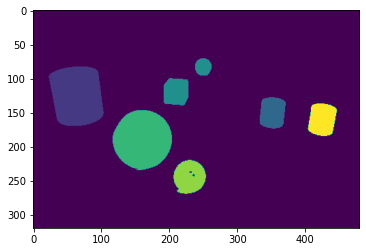

In [ ]:
plt.imshow(img_data.reshape(320, 480,1))
plt.show()

Vidime ze 2 obrjekty nam kmean spojil do jedneho. Problemom je teda ze objekty su pri sebe a nemaju ziadnu informaciu o farbe ktora by ich oddelila

* 4. pokus(Bonus)
Budeme pouzivat farby aj suradnice. Objekty rozlisime roznou farbou aby sme sa zbavili tiena a odrazu. Ostanu nam teda objekty zafarbene roznymi farbam. 

In [ ]:
from scipy import ndimage
# colors masks of image every object gets different color
def color_mask(mask, w, h):
    zeros = np.zeros(shape=(h, w, 3), dtype=np.uint8)
    #differenciate objects (!!! NOT EQUAL TO FINAL OBJ COUNT ONLY FOR PAINTING)
    obj_arr, number_of_obj = ndimage.label(mask)
    # enough for this dataset (tested)
    colors = {
        0: [0, 0, 0],
        1: [165,42,42],
        2: [255,127,80],
        3: [139,90,139],
        4: [255,255,51],
        5: [13,128,128],
        6: [255, 230, 230],
        7: [210,180,140],
        8: [255,15,14],
        9: [100, 50, 50],
        10: [150, 200, 200]
    }

    for obj in range(0, number_of_obj+1):
        #Add color to image
        zeros[obj_arr==obj] = colors[obj]

    plt.imshow(zeros)
    plt.show()
    return zeros

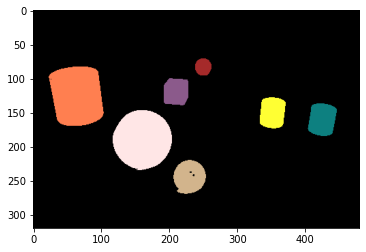

In [ ]:
m = color_mask(labels.reshape(320, 480), 480, 320)

In [ ]:
img_array = m.reshape(320 * 480, 3)
coordinate = perform_meshgrid(img_array, 480, 320)
filtered = coordinate[labels != 0]

In [ ]:
max_score = calculate_max_silhouette_score(filtered)

For n_clusters = 2, silhouette score is 0.4677985668127005)
For n_clusters = 3, silhouette score is 0.5993386568644534)
For n_clusters = 4, silhouette score is 0.6556396948297276)
For n_clusters = 5, silhouette score is 0.7432766502832162)
For n_clusters = 6, silhouette score is 0.7911536722802013)
For n_clusters = 7, silhouette score is 0.807223181600002)
For n_clusters = 8, silhouette score is 0.681303378794802)
For n_clusters = 9, silhouette score is 0.5558277626859365)
Optimal number of clusters 7


* Nasa predpoved poctu objektov bola tentokrat spravna. Pozrieme sa ci bolo aj rozdelenie objektov spravne

In [ ]:
labels_ = perform_kmeans(filtered, max_score)

img_data = np.zeros(480*320)
img_data[labels != 0] = labels_ + 1

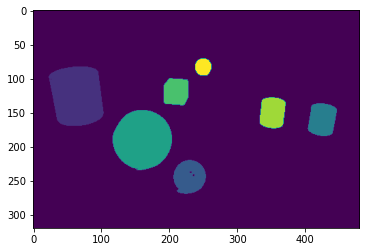

[0 1 2 3 4 5 6]


In [ ]:
plt.imshow(img_data.reshape(320, 480,1))
plt.show()
print(np.unique(labels_))

* Ako je mozne vidiet na obrazku nase rozdelenie je spravne. To je vdaka priznaku farieb ktory nam pomohol rozoznat objekty ktore boli v minulom pokuse spojene

* Skusime nasledne vyhodnotit cely dataset.
* Zmenime vahu pre farby na 1.5x (naladene pre tento dataset).

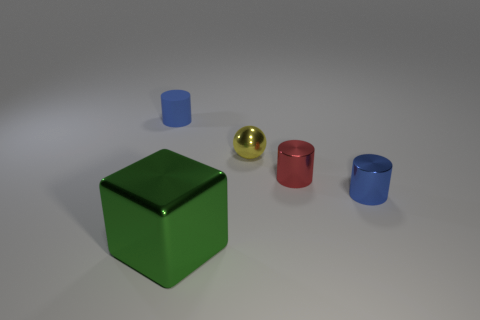

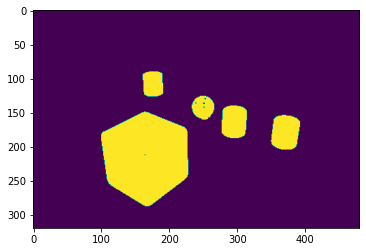

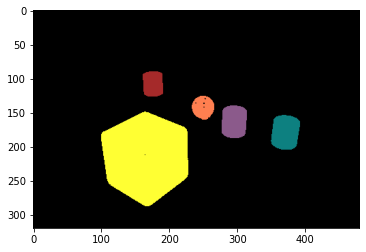

For n_clusters = 2, silhouette score is 0.7354144153978877)
For n_clusters = 3, silhouette score is 0.7587332875607884)
For n_clusters = 4, silhouette score is 0.7888569191146173)
For n_clusters = 5, silhouette score is 0.79123906219977)
For n_clusters = 6, silhouette score is 0.5097872409496965)
For n_clusters = 7, silhouette score is 0.5340578192559766)
For n_clusters = 8, silhouette score is 0.5228935910608603)
For n_clusters = 9, silhouette score is 0.511931553420434)
Optimal number of clusters 5


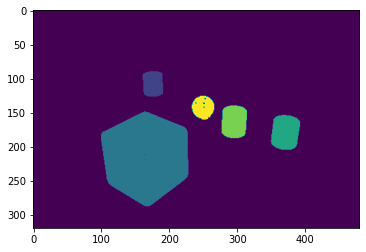

[0 1 2 3 4]
RIGHT /work/data/CLEVR_test_000014.png


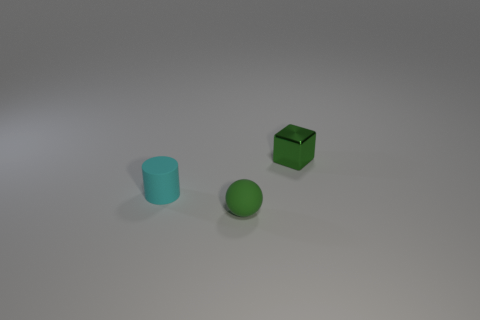

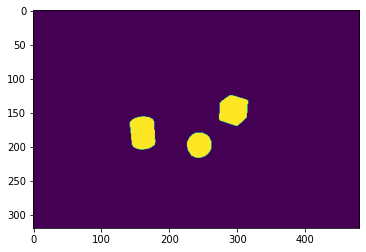

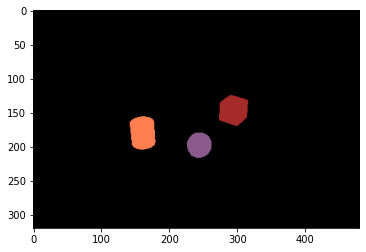

For n_clusters = 2, silhouette score is 0.6997753112451357)
For n_clusters = 3, silhouette score is 0.9008726035218161)
For n_clusters = 4, silhouette score is 0.7137351144610886)
For n_clusters = 5, silhouette score is 0.5162693756877315)
For n_clusters = 6, silhouette score is 0.5273562896962481)
For n_clusters = 7, silhouette score is 0.38180811986953617)
For n_clusters = 8, silhouette score is 0.37313079333527066)
For n_clusters = 9, silhouette score is 0.37110466276373877)
Optimal number of clusters 3


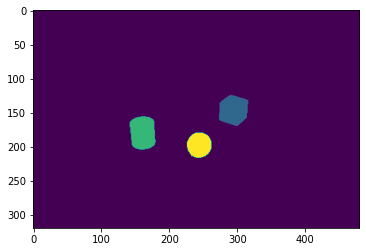

[0 1 2]
RIGHT /work/data/CLEVR_test_000214.png


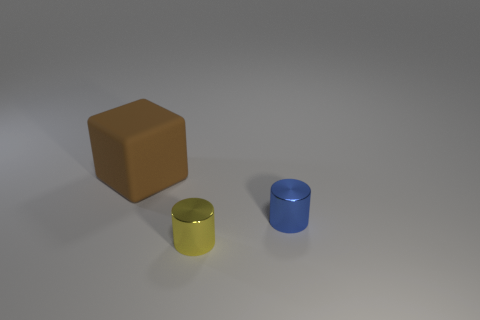

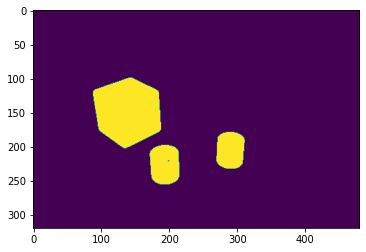

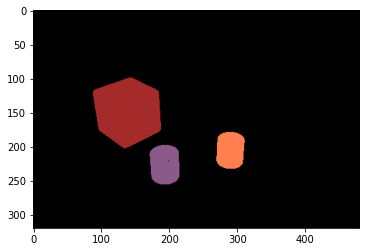

For n_clusters = 2, silhouette score is 0.6697244654904893)
For n_clusters = 3, silhouette score is 0.8095054989695917)
For n_clusters = 4, silhouette score is 0.53595300079349)
For n_clusters = 5, silhouette score is 0.5578828271723244)
For n_clusters = 6, silhouette score is 0.5552208817739712)
For n_clusters = 7, silhouette score is 0.5375793527103132)
For n_clusters = 8, silhouette score is 0.4522043208374793)
For n_clusters = 9, silhouette score is 0.4489038416028326)
Optimal number of clusters 3


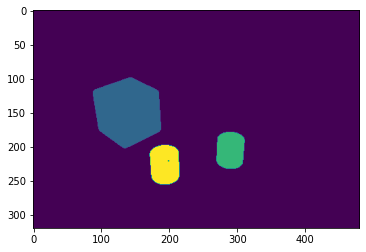

[0 1 2]
RIGHT /work/data/CLEVR_test_000377.png


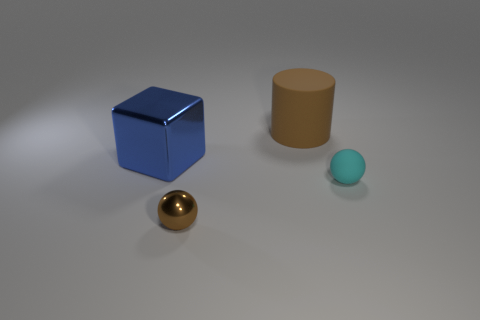

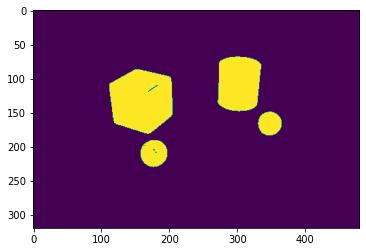

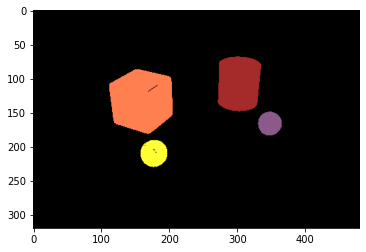

For n_clusters = 2, silhouette score is 0.7046929190861024)
For n_clusters = 3, silhouette score is 0.7691862157787386)
For n_clusters = 4, silhouette score is 0.8223837316283822)
For n_clusters = 5, silhouette score is 0.5936206449548206)
For n_clusters = 6, silhouette score is 0.6094828533911858)
For n_clusters = 7, silhouette score is 0.4795956307800134)
For n_clusters = 8, silhouette score is 0.4697570910976087)
For n_clusters = 9, silhouette score is 0.4649740595366513)
Optimal number of clusters 4


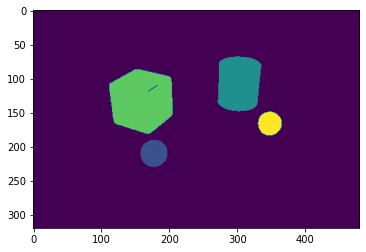

[0 1 2 3]
RIGHT /work/data/CLEVR_test_000388.png


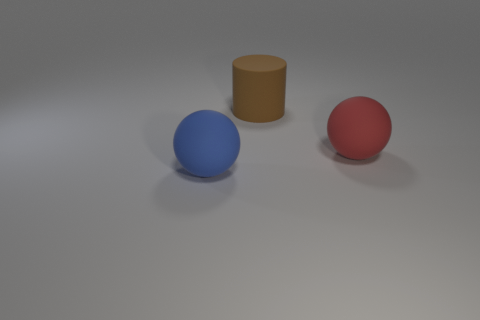

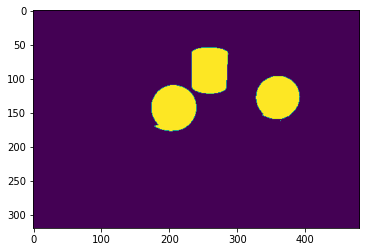

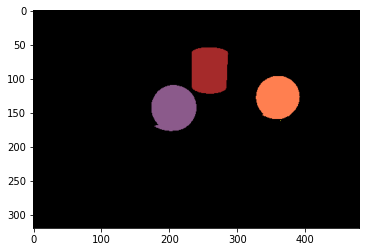

For n_clusters = 2, silhouette score is 0.6527951266013391)
For n_clusters = 3, silhouette score is 0.8473472803285029)
For n_clusters = 4, silhouette score is 0.7019889821990372)
For n_clusters = 5, silhouette score is 0.5316105404725342)
For n_clusters = 6, silhouette score is 0.3672738033388638)
For n_clusters = 7, silhouette score is 0.37682930398346115)
For n_clusters = 8, silhouette score is 0.3867685636970723)
For n_clusters = 9, silhouette score is 0.3828735184455509)
Optimal number of clusters 3


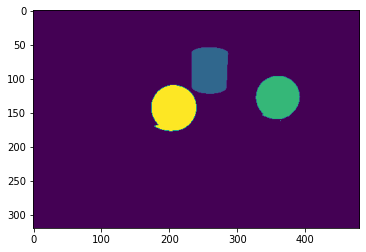

[0 1 2]
RIGHT /work/data/CLEVR_test_000389.png


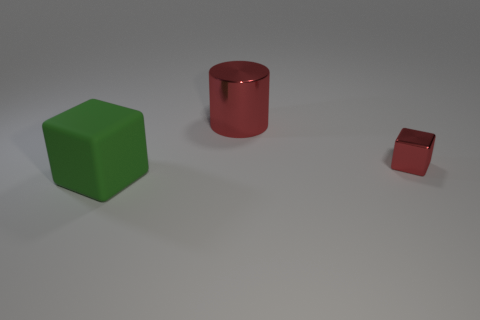

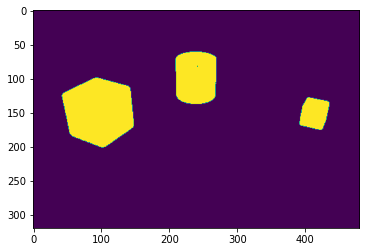

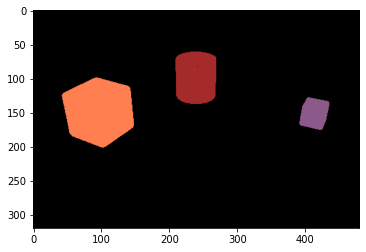

For n_clusters = 2, silhouette score is 0.7348413396473036)
For n_clusters = 3, silhouette score is 0.8389903707795167)
For n_clusters = 4, silhouette score is 0.5687098884612622)
For n_clusters = 5, silhouette score is 0.5866127373197345)
For n_clusters = 6, silhouette score is 0.45271484688278196)
For n_clusters = 7, silhouette score is 0.44502763207417784)
For n_clusters = 8, silhouette score is 0.43315606671596835)
For n_clusters = 9, silhouette score is 0.4315585555227743)
Optimal number of clusters 3


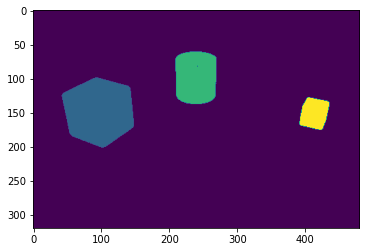

[0 1 2]
RIGHT /work/data/CLEVR_test_000411.png


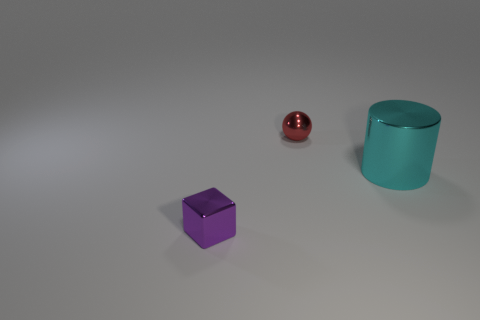

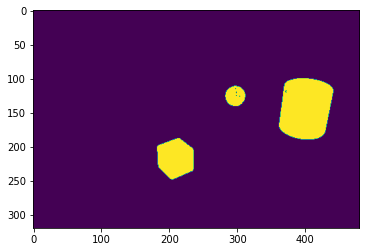

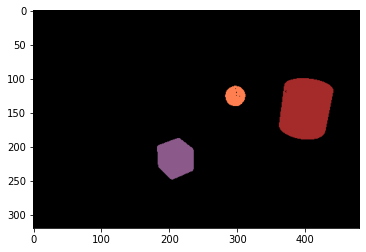

For n_clusters = 2, silhouette score is 0.7654101511905493)
For n_clusters = 3, silhouette score is 0.849430397586984)
For n_clusters = 4, silhouette score is 0.5744180590270069)
For n_clusters = 5, silhouette score is 0.5690034962462145)
For n_clusters = 6, silhouette score is 0.568535541306104)
For n_clusters = 7, silhouette score is 0.41901691696498045)
For n_clusters = 8, silhouette score is 0.40992584134280236)
For n_clusters = 9, silhouette score is 0.4179643424774387)
Optimal number of clusters 3


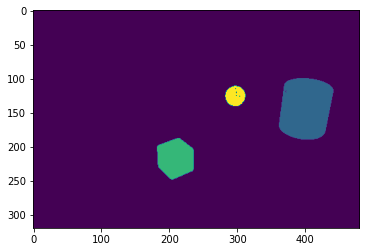

[0 1 2]
RIGHT /work/data/CLEVR_test_000439.png


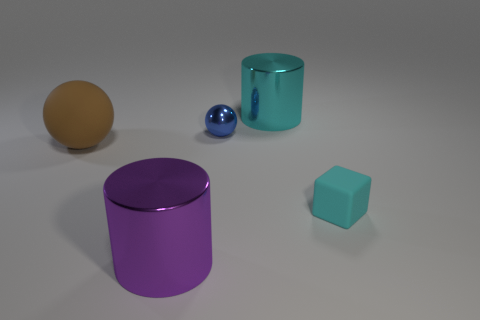

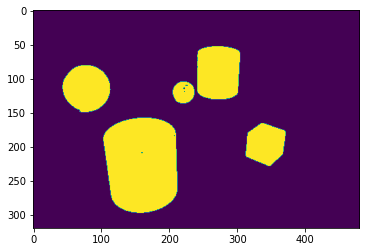

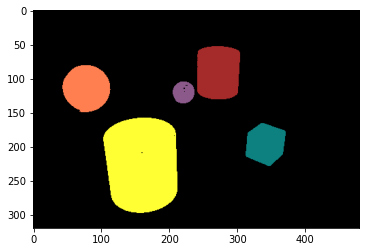

For n_clusters = 2, silhouette score is 0.641709595459016)
For n_clusters = 3, silhouette score is 0.6809909559380618)
For n_clusters = 4, silhouette score is 0.7838404106111148)
For n_clusters = 5, silhouette score is 0.8031773303444953)
For n_clusters = 6, silhouette score is 0.6156975125265108)
For n_clusters = 7, silhouette score is 0.6099529096906021)
For n_clusters = 8, silhouette score is 0.606098435702049)
For n_clusters = 9, silhouette score is 0.5292241646421688)
Optimal number of clusters 5


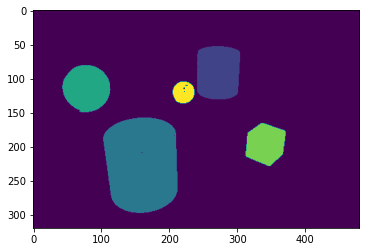

[0 1 2 3 4]
RIGHT /work/data/CLEVR_test_000558.png


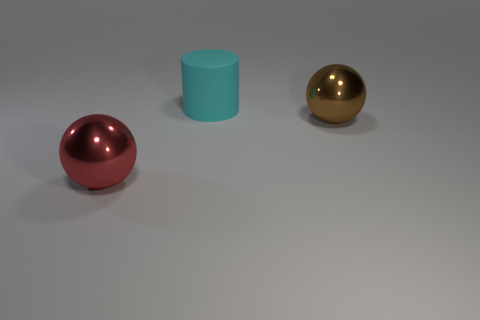

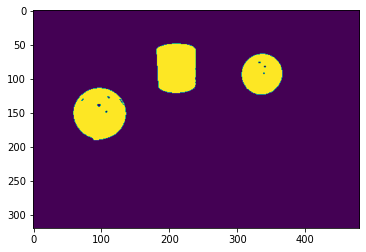

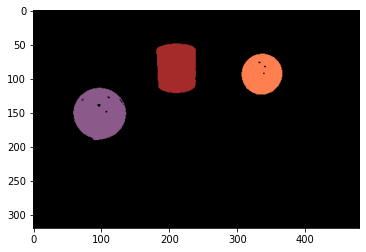

For n_clusters = 2, silhouette score is 0.6423029887698567)
For n_clusters = 3, silhouette score is 0.8531415045435229)
For n_clusters = 4, silhouette score is 0.652929539018206)
For n_clusters = 5, silhouette score is 0.4994730420949686)
For n_clusters = 6, silhouette score is 0.5121360543123292)
For n_clusters = 7, silhouette score is 0.3771607155095093)
For n_clusters = 8, silhouette score is 0.37510343079456304)
For n_clusters = 9, silhouette score is 0.3699113553895456)
Optimal number of clusters 3


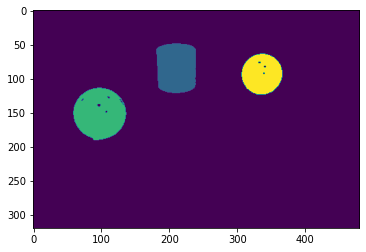

[0 1 2]
RIGHT /work/data/CLEVR_test_000559.png


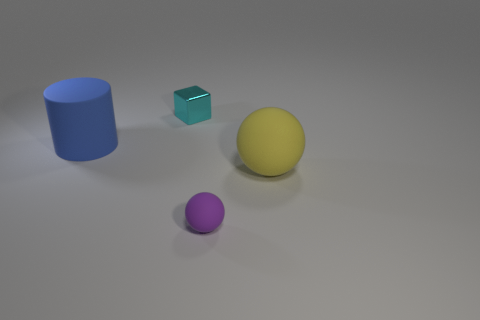

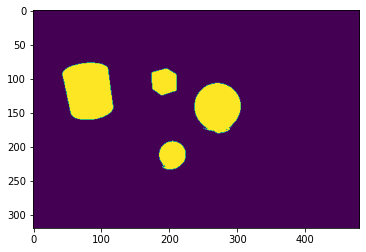

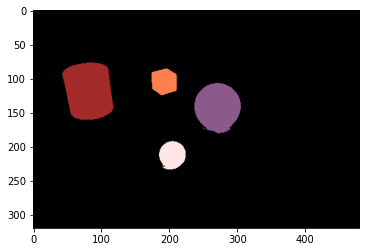

For n_clusters = 2, silhouette score is 0.6200025130138747)
For n_clusters = 3, silhouette score is 0.7435390262857842)
For n_clusters = 4, silhouette score is 0.8628018649897026)
For n_clusters = 5, silhouette score is 0.6673244539897405)
For n_clusters = 6, silhouette score is 0.4976895343767999)
For n_clusters = 7, silhouette score is 0.4926752419794766)
For n_clusters = 8, silhouette score is 0.5040266259347084)
For n_clusters = 9, silhouette score is 0.5035675040796757)
Optimal number of clusters 4


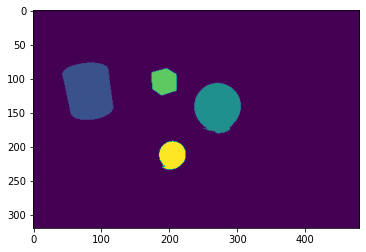

[0 1 2 3]
RIGHT /work/data/CLEVR_test_000565.png


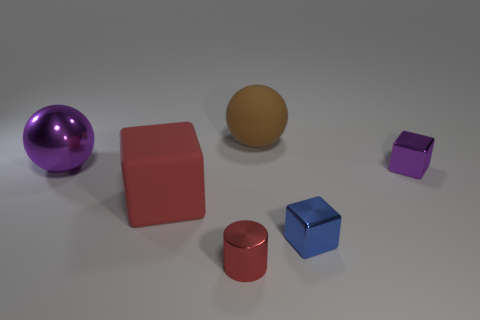

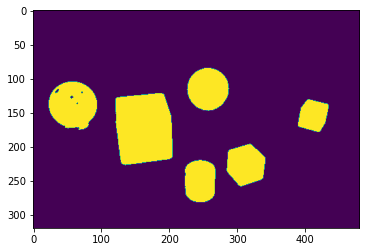

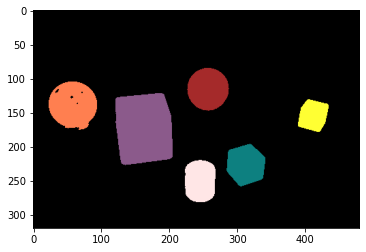

For n_clusters = 2, silhouette score is 0.5045244758254998)
For n_clusters = 3, silhouette score is 0.5404814610571584)
For n_clusters = 4, silhouette score is 0.6566958432965685)
For n_clusters = 5, silhouette score is 0.7339641919173159)
For n_clusters = 6, silhouette score is 0.8458340932451968)
For n_clusters = 7, silhouette score is 0.7092928259694228)
For n_clusters = 8, silhouette score is 0.7017670562600403)
For n_clusters = 9, silhouette score is 0.7051549035910298)
Optimal number of clusters 6


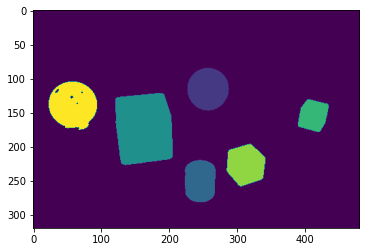

[0 1 2 3 4 5]
RIGHT /work/data/CLEVR_test_000606.png


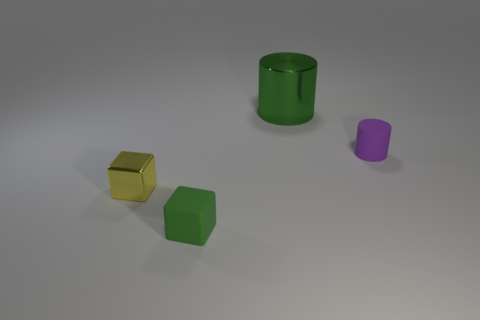

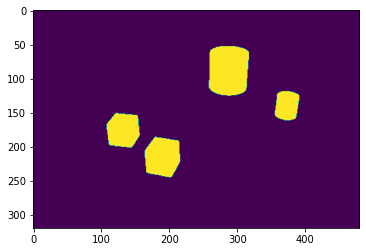

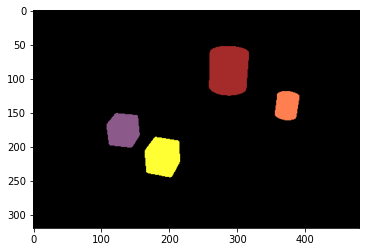

For n_clusters = 2, silhouette score is 0.6269333188747207)
For n_clusters = 3, silhouette score is 0.7513725041488658)
For n_clusters = 4, silhouette score is 0.8861282033986382)
For n_clusters = 5, silhouette score is 0.7063281798521438)
For n_clusters = 6, silhouette score is 0.7015898076219796)
For n_clusters = 7, silhouette score is 0.5563205265797027)
For n_clusters = 8, silhouette score is 0.5602355961416811)
For n_clusters = 9, silhouette score is 0.4458994166424557)
Optimal number of clusters 4


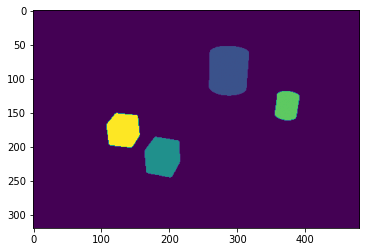

[0 1 2 3]
RIGHT /work/data/CLEVR_test_000758.png


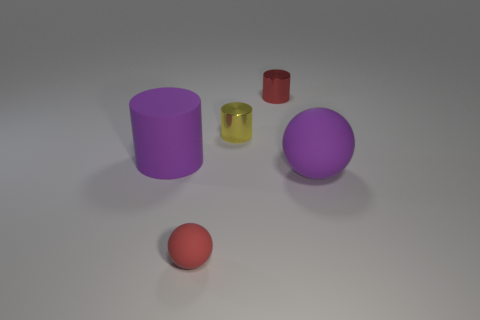

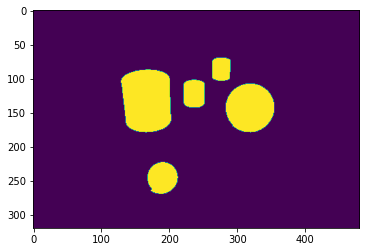

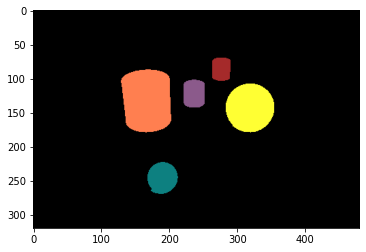

For n_clusters = 2, silhouette score is 0.561760938242772)
For n_clusters = 3, silhouette score is 0.7055455693778833)
For n_clusters = 4, silhouette score is 0.8107498137458784)
For n_clusters = 5, silhouette score is 0.8574895408614415)
For n_clusters = 6, silhouette score is 0.6797159762018709)
For n_clusters = 7, silhouette score is 0.6704496810341418)
For n_clusters = 8, silhouette score is 0.5184868728517535)
For n_clusters = 9, silhouette score is 0.5287236835508717)
Optimal number of clusters 5


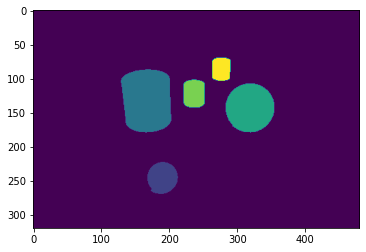

[0 1 2 3 4]
RIGHT /work/data/CLEVR_test_000766.png


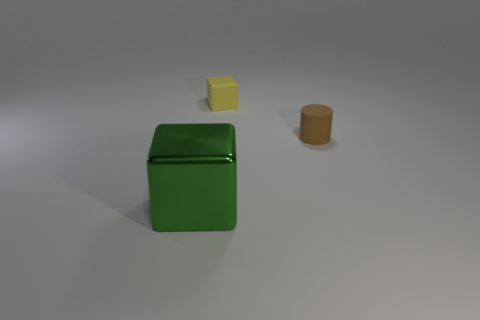

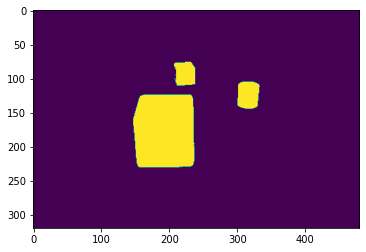

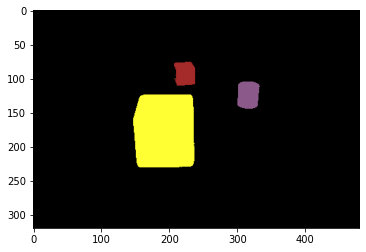

For n_clusters = 2, silhouette score is 0.8321833381031065)
For n_clusters = 3, silhouette score is 0.8693994646003448)
For n_clusters = 4, silhouette score is 0.49350090571288646)
For n_clusters = 5, silhouette score is 0.48384568548128526)
For n_clusters = 6, silhouette score is 0.49037782068837543)
For n_clusters = 7, silhouette score is 0.48045536910468273)
For n_clusters = 8, silhouette score is 0.47140288979206596)
For n_clusters = 9, silhouette score is 0.4771866063368316)
Optimal number of clusters 3


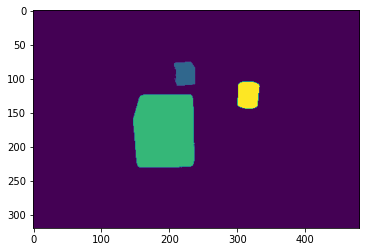

[0 1 2]
RIGHT /work/data/CLEVR_test_000770.png


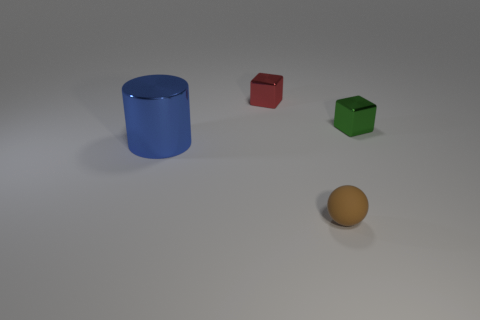

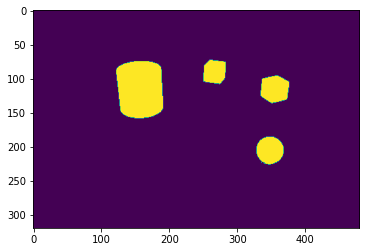

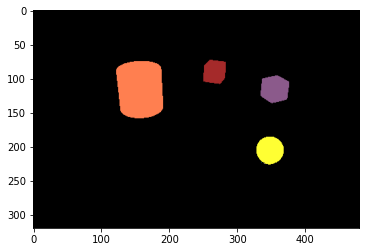

For n_clusters = 2, silhouette score is 0.6036839538426418)
For n_clusters = 3, silhouette score is 0.7974445805685298)
For n_clusters = 4, silhouette score is 0.8693702264618248)
For n_clusters = 5, silhouette score is 0.6165325078333466)
For n_clusters = 6, silhouette score is 0.6097285332165555)
For n_clusters = 7, silhouette score is 0.607624259711978)
For n_clusters = 8, silhouette score is 0.6001346456200498)
For n_clusters = 9, silhouette score is 0.591778747073545)
Optimal number of clusters 4


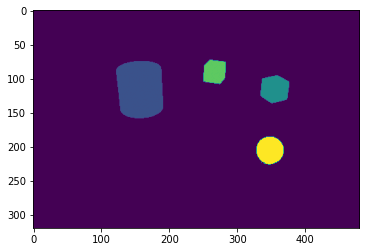

[0 1 2 3]
RIGHT /work/data/CLEVR_test_000821.png


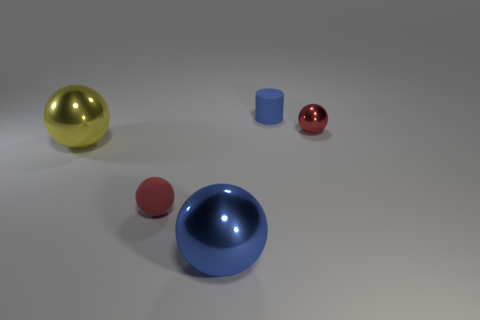

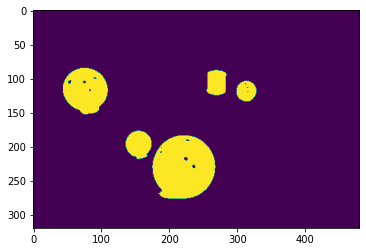

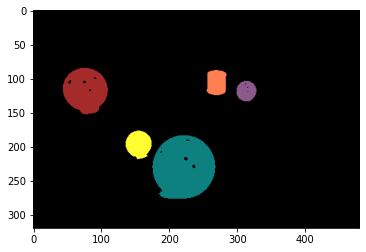

For n_clusters = 2, silhouette score is 0.659460223981309)
For n_clusters = 3, silhouette score is 0.7729475109499825)
For n_clusters = 4, silhouette score is 0.8442669441377318)
For n_clusters = 5, silhouette score is 0.8654690509557785)
For n_clusters = 6, silhouette score is 0.6159607205534038)
For n_clusters = 7, silhouette score is 0.6318184807804688)
For n_clusters = 8, silhouette score is 0.4917784828302263)
For n_clusters = 9, silhouette score is 0.48702601197753775)
Optimal number of clusters 5


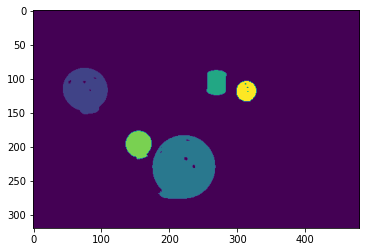

[0 1 2 3 4]
RIGHT /work/data/CLEVR_test_000835.png


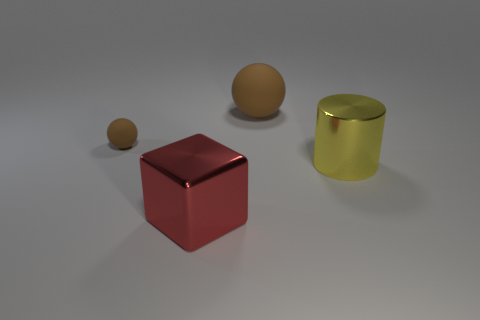

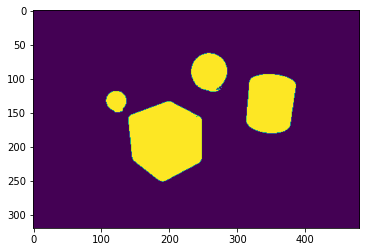

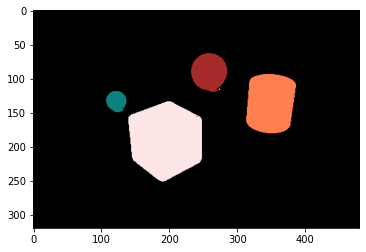

For n_clusters = 2, silhouette score is 0.7252890872972152)
For n_clusters = 3, silhouette score is 0.7947728005955517)
For n_clusters = 4, silhouette score is 0.8478269893802056)
For n_clusters = 5, silhouette score is 0.5794574528273586)
For n_clusters = 6, silhouette score is 0.6013523009816829)
For n_clusters = 7, silhouette score is 0.4744168522254891)
For n_clusters = 8, silhouette score is 0.4715115306510557)
For n_clusters = 9, silhouette score is 0.46657182490184584)
Optimal number of clusters 4


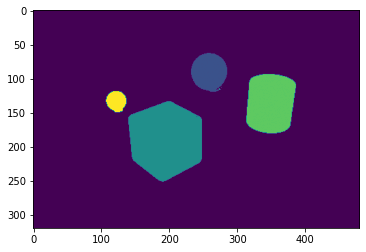

[0 1 2 3]
RIGHT /work/data/CLEVR_test_000837.png


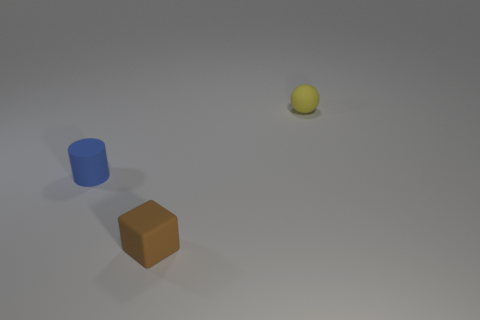

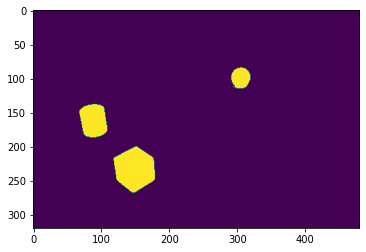

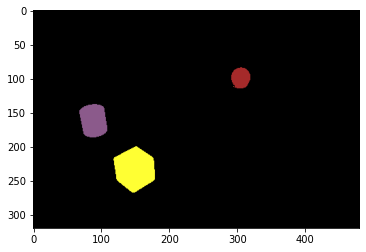

For n_clusters = 2, silhouette score is 0.8035129145181793)
For n_clusters = 3, silhouette score is 0.9247995257194963)
For n_clusters = 4, silhouette score is 0.6066414225229048)
For n_clusters = 5, silhouette score is 0.6234194610929129)
For n_clusters = 6, silhouette score is 0.46268300735325024)
For n_clusters = 7, silhouette score is 0.45821260196039104)
For n_clusters = 8, silhouette score is 0.4456774642236758)
For n_clusters = 9, silhouette score is 0.43773874127479434)
Optimal number of clusters 3


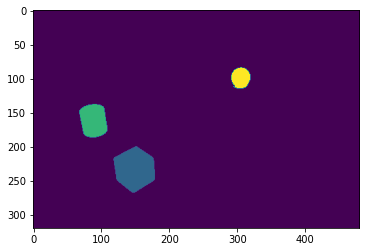

[0 1 2]
RIGHT /work/data/CLEVR_test_000941.png


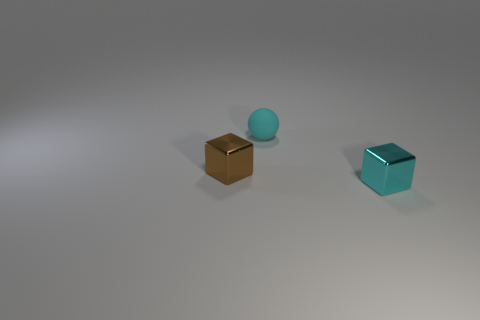

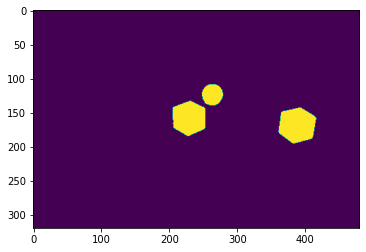

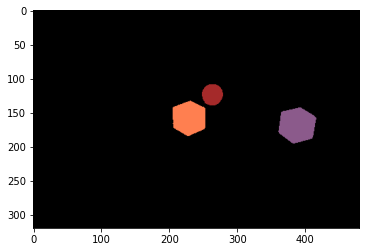

For n_clusters = 2, silhouette score is 0.7362849693213289)
For n_clusters = 3, silhouette score is 0.8931110309372651)
For n_clusters = 4, silhouette score is 0.6558513552768279)
For n_clusters = 5, silhouette score is 0.44195595270495436)
For n_clusters = 6, silhouette score is 0.4523278582128702)
For n_clusters = 7, silhouette score is 0.4652379329425916)
For n_clusters = 8, silhouette score is 0.45985598804755967)
For n_clusters = 9, silhouette score is 0.4583875687420589)
Optimal number of clusters 3


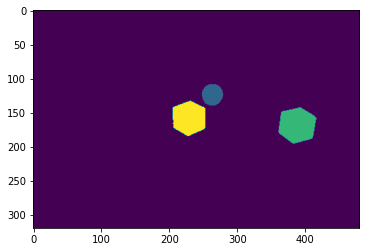

[0 1 2]
RIGHT /work/data/CLEVR_test_000955.png


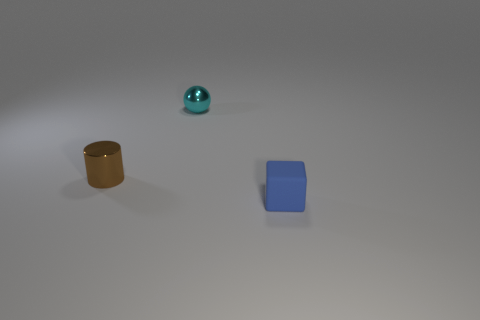

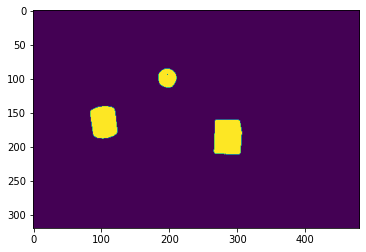

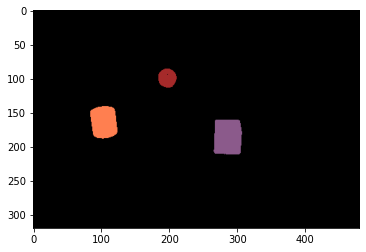

For n_clusters = 2, silhouette score is 0.7514069935357844)
For n_clusters = 3, silhouette score is 0.9028611002389825)
For n_clusters = 4, silhouette score is 0.6736565742441477)
For n_clusters = 5, silhouette score is 0.47829206427909327)
For n_clusters = 6, silhouette score is 0.4706787947934798)
For n_clusters = 7, silhouette score is 0.47158007319530104)
For n_clusters = 8, silhouette score is 0.4661793561458695)
For n_clusters = 9, silhouette score is 0.4667278637050061)
Optimal number of clusters 3


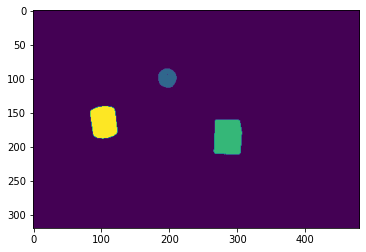

[0 1 2]
RIGHT /work/data/CLEVR_test_000994.png


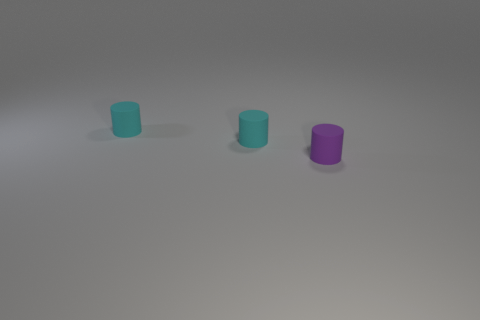

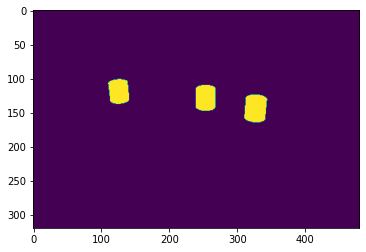

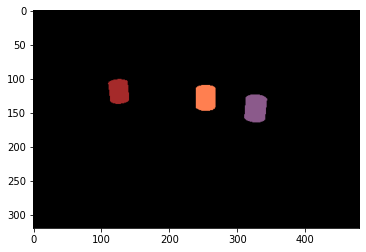

For n_clusters = 2, silhouette score is 0.6505857345840514)
For n_clusters = 3, silhouette score is 0.9226901916413898)
For n_clusters = 4, silhouette score is 0.7316392136935034)
For n_clusters = 5, silhouette score is 0.5638718662998915)
For n_clusters = 6, silhouette score is 0.40297286671053745)
For n_clusters = 7, silhouette score is 0.39528152645464937)
For n_clusters = 8, silhouette score is 0.3890893994387305)
For n_clusters = 9, silhouette score is 0.38823897361064874)
Optimal number of clusters 3


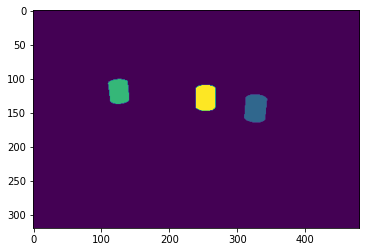

[0 1 2]
RIGHT /work/data/CLEVR_test_000997.png


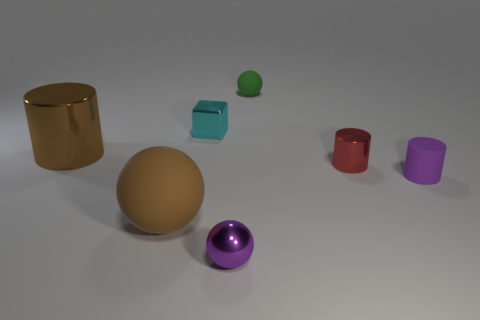

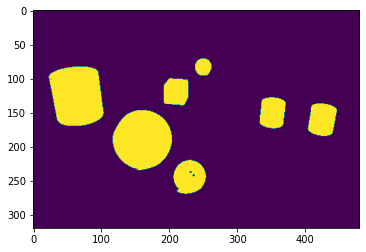

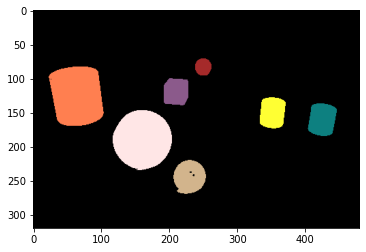

For n_clusters = 2, silhouette score is 0.4771486411702089)
For n_clusters = 3, silhouette score is 0.6018138467992231)
For n_clusters = 4, silhouette score is 0.6999842642769962)
For n_clusters = 5, silhouette score is 0.765496583066806)
For n_clusters = 6, silhouette score is 0.8274441982937975)
For n_clusters = 7, silhouette score is 0.8496210101881883)
For n_clusters = 8, silhouette score is 0.7083555737489348)
For n_clusters = 9, silhouette score is 0.5635667337089013)
Optimal number of clusters 7


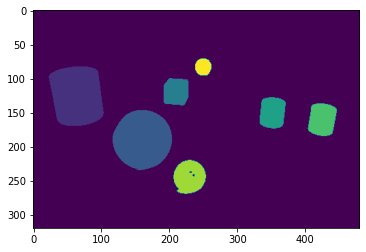

[0 1 2 3 4 5 6]
RIGHT /work/data/CLEVR_test_001109.png


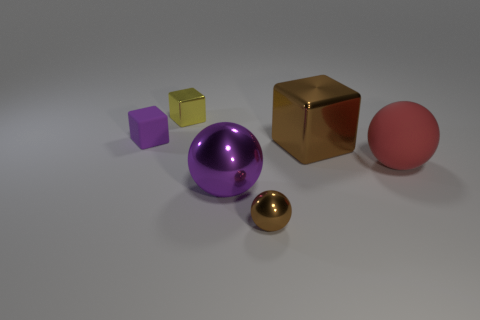

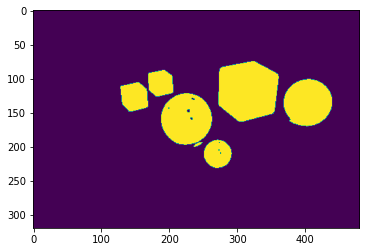

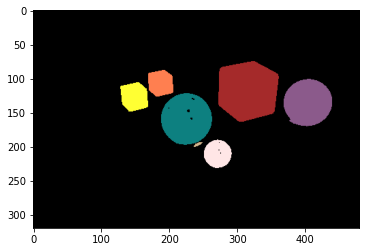

For n_clusters = 2, silhouette score is 0.5090995862484311)
For n_clusters = 3, silhouette score is 0.645493094700624)
For n_clusters = 4, silhouette score is 0.7336922311265859)
For n_clusters = 5, silhouette score is 0.797452361831369)
For n_clusters = 6, silhouette score is 0.8420039002494399)
For n_clusters = 7, silhouette score is 0.6915685893922442)
For n_clusters = 8, silhouette score is 0.7003392445140538)
For n_clusters = 9, silhouette score is 0.5740182686567851)
Optimal number of clusters 6


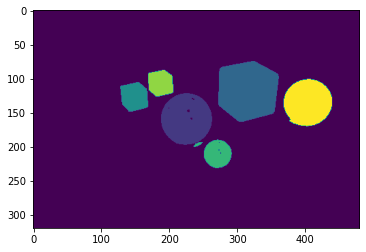

[0 1 2 3 4 5]
RIGHT /work/data/CLEVR_test_001256.png


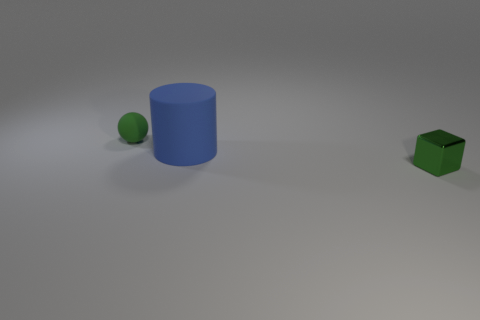

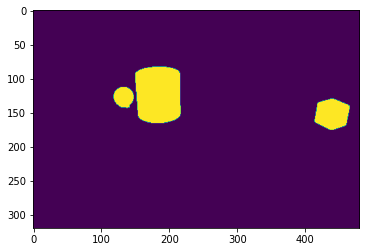

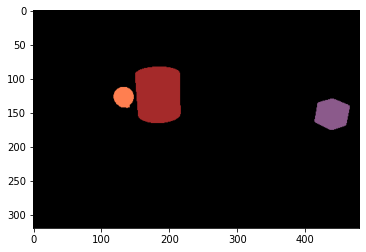

For n_clusters = 2, silhouette score is 0.8121316304412171)
For n_clusters = 3, silhouette score is 0.8552607095779067)
For n_clusters = 4, silhouette score is 0.5788085708126178)
For n_clusters = 5, silhouette score is 0.5704223250887447)
For n_clusters = 6, silhouette score is 0.5688698045527706)
For n_clusters = 7, silhouette score is 0.4346002761902842)
For n_clusters = 8, silhouette score is 0.42653027647228176)
For n_clusters = 9, silhouette score is 0.4171285035351224)
Optimal number of clusters 3


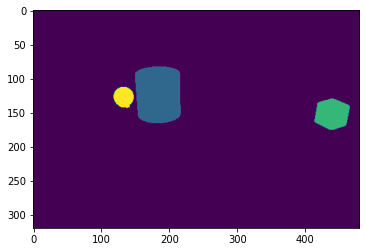

[0 1 2]
RIGHT /work/data/CLEVR_test_001294.png


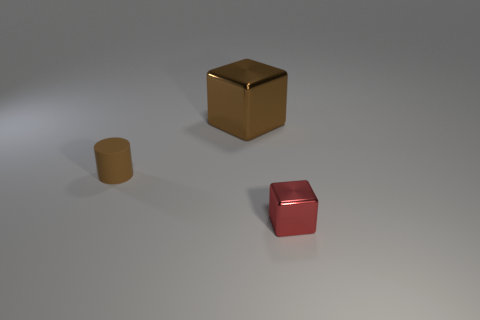

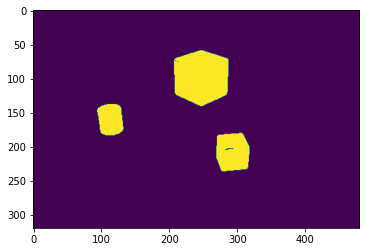

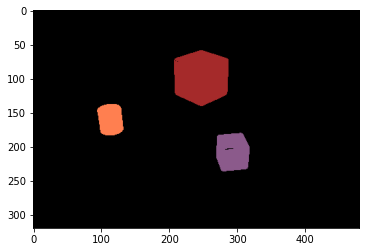

For n_clusters = 2, silhouette score is 0.623007712326378)
For n_clusters = 3, silhouette score is 0.8497178307416008)
For n_clusters = 4, silhouette score is 0.5809404378380646)
For n_clusters = 5, silhouette score is 0.5945139371509844)
For n_clusters = 6, silhouette score is 0.5912849618446702)
For n_clusters = 7, silhouette score is 0.46400039720296193)
For n_clusters = 8, silhouette score is 0.4517083488268049)
For n_clusters = 9, silhouette score is 0.4538176395062621)
Optimal number of clusters 3


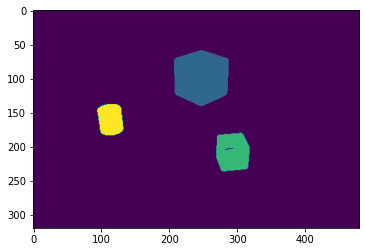

[0 1 2]
RIGHT /work/data/CLEVR_test_001525.png


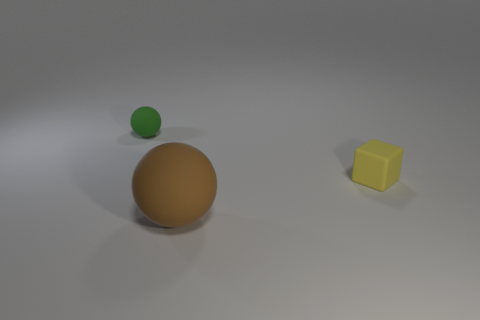

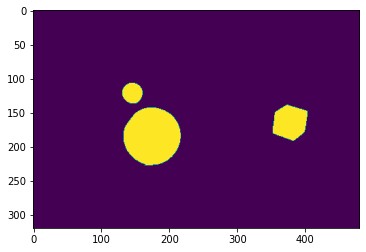

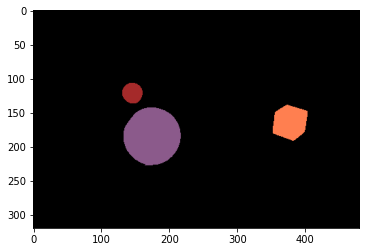

For n_clusters = 2, silhouette score is 0.8071796445913981)
For n_clusters = 3, silhouette score is 0.8346379576477999)
For n_clusters = 4, silhouette score is 0.5363579668541265)
For n_clusters = 5, silhouette score is 0.5558923738030046)
For n_clusters = 6, silhouette score is 0.5490960086648811)
For n_clusters = 7, silhouette score is 0.5355545885378072)
For n_clusters = 8, silhouette score is 0.39741903152571295)
For n_clusters = 9, silhouette score is 0.41293707224913023)
Optimal number of clusters 3


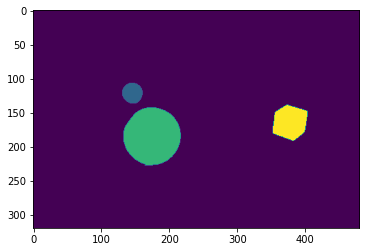

[0 1 2]
RIGHT /work/data/CLEVR_test_001530.png


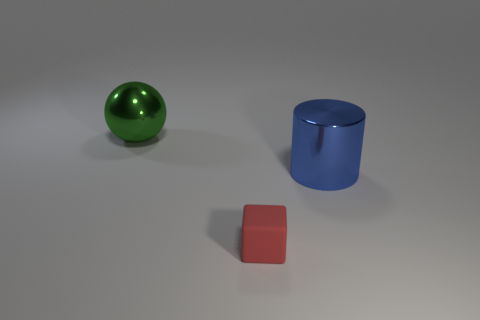

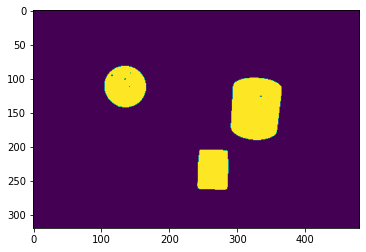

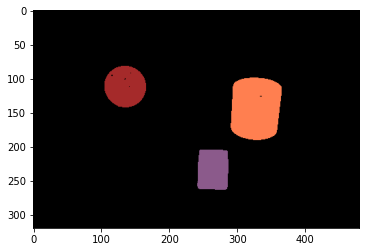

For n_clusters = 2, silhouette score is 0.6615409522649676)
For n_clusters = 3, silhouette score is 0.8557979823021779)
For n_clusters = 4, silhouette score is 0.6348661965478601)
For n_clusters = 5, silhouette score is 0.6263963910898321)
For n_clusters = 6, silhouette score is 0.6241238392488807)
For n_clusters = 7, silhouette score is 0.5166436660431243)
For n_clusters = 8, silhouette score is 0.38137381037556944)
For n_clusters = 9, silhouette score is 0.38977896103193604)
Optimal number of clusters 3


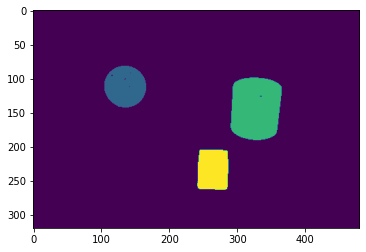

[0 1 2]
RIGHT /work/data/CLEVR_test_001652.png


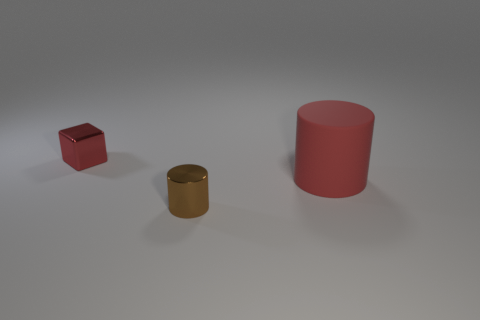

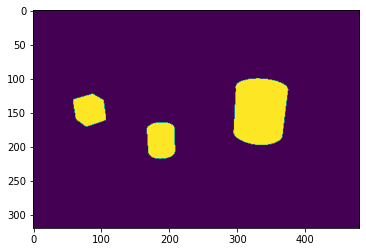

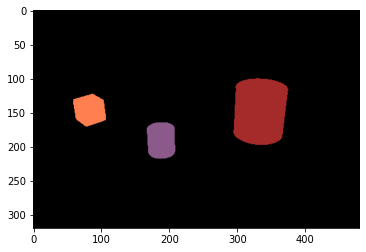

For n_clusters = 2, silhouette score is 0.7243803316719123)
For n_clusters = 3, silhouette score is 0.8435495805056297)
For n_clusters = 4, silhouette score is 0.5800796445289216)
For n_clusters = 5, silhouette score is 0.5736427769446667)
For n_clusters = 6, silhouette score is 0.568767254091861)
For n_clusters = 7, silhouette score is 0.5630063707311064)
For n_clusters = 8, silhouette score is 0.4702996606196293)
For n_clusters = 9, silhouette score is 0.4603509365100004)
Optimal number of clusters 3


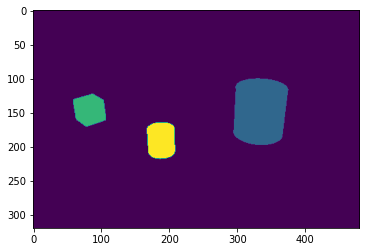

[0 1 2]
RIGHT /work/data/CLEVR_test_001685.png


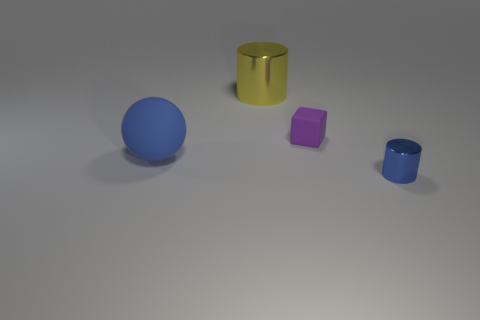

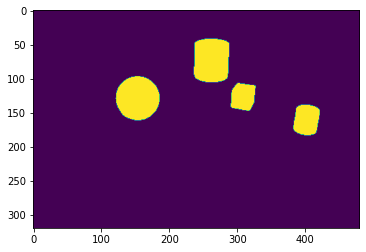

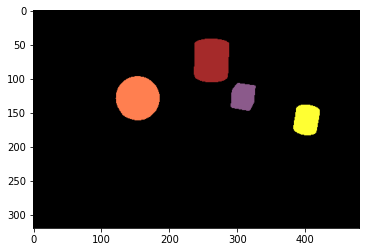

For n_clusters = 2, silhouette score is 0.6239162159385013)
For n_clusters = 3, silhouette score is 0.7663583651306268)
For n_clusters = 4, silhouette score is 0.8768502742816779)
For n_clusters = 5, silhouette score is 0.7254933509786884)
For n_clusters = 6, silhouette score is 0.5334180324220593)
For n_clusters = 7, silhouette score is 0.5453261411107929)
For n_clusters = 8, silhouette score is 0.5402127229905214)
For n_clusters = 9, silhouette score is 0.541248476904342)
Optimal number of clusters 4


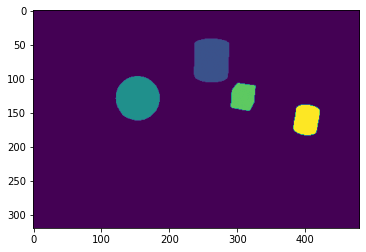

[0 1 2 3]
RIGHT /work/data/CLEVR_test_001687.png


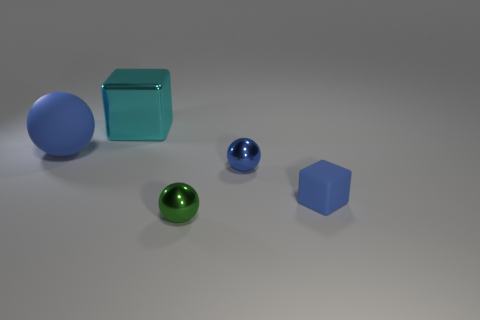

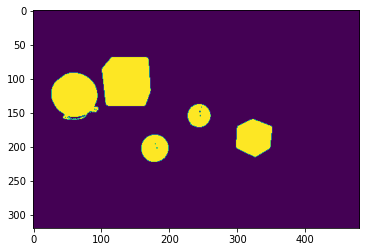

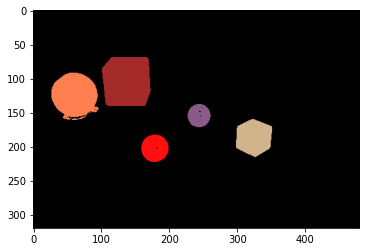

For n_clusters = 2, silhouette score is 0.5684775221661075)
For n_clusters = 3, silhouette score is 0.6925008144491187)
For n_clusters = 4, silhouette score is 0.7856123389495676)
For n_clusters = 5, silhouette score is 0.8472753632341194)
For n_clusters = 6, silhouette score is 0.6834759932965668)
For n_clusters = 7, silhouette score is 0.6834909069471365)
For n_clusters = 8, silhouette score is 0.5429815553852408)
For n_clusters = 9, silhouette score is 0.5506546359591804)
Optimal number of clusters 5


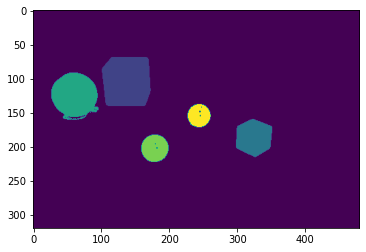

[0 1 2 3 4]
RIGHT /work/data/CLEVR_test_001690.png


In [ ]:
def get_files():
    root = "/work/data"
    files = []
    for filename in os.listdir(root):
        f = os.path.join(root, filename)
        files.append(f)
    files.sort()
    return files

files = get_files()
rights = 0
for f, ref in zip(files, ref_ans):
    img_hsv = read_image(f, "HSV")
    img_array_hsv = reshape(img_hsv, 3)

    sat = cut_saturation(img_array_hsv, img_hsv)
    labels = perform_kmeans(sat, 2)

    plt.imshow(labels.reshape(320, 480,1))
    plt.show()

    m = color_mask(labels.reshape(320, 480), 480, 320)

    img_array = m.reshape(320 * 480, 3)
    coordinate = perform_meshgrid(img_array, 480, 320)
    filtered = coordinate[labels != 0]

    #print(filtered)
    #multiply color weight
    filtered[:,(0,1,2)]  = filtered[:,(0,1,2)] * 1.5
    #print(filtered)
    max_score = calculate_max_silhouette_score(filtered)

    labels_ = perform_kmeans(filtered, max_score)

    img_data = np.zeros(480*320)

    img_data[labels != 0] = labels_ + 1

    plt.imshow(img_data.reshape(320, 480,1))
    plt.show()
    print(np.unique(labels_))

    if (max_score == ref):
        print("RIGHT", f)
        rights += 1
    else:
        print("WRONG", f)

In [ ]:
print("Accurecity of algorithm for this dataset is:", (rights/len(files))*100, "%")

Accurecity of algorithm for this dataset is: 100.0 %


* Problemy: 
1. Pozadie - funguje iba pre toto pozadie, Pozadie sme odstranovali na zaklade saturacie. Ak by malo saturaciu inu mohlo by sa zlucit s obrazkami a neslo by ho odstanit.
2. Clusteing: Clustre su pocitane iba pre max pocet 9tich objektov.
3. Farby: Farby ktore pridavame objektom v maske su presne vybrate aby sedeli pre tento dataset a spravne delili objekty (mozne riesenie- random farby)
* Zaver
V algoritme sme pouzili ako farebne tak aj suradnicove priznaky s tym, ze farebnym sme pridali vyssiu vahu. To bolo mozne vdaka Roztriedeniu farieb pre objekty.\
Postup riesenia: nacitanie obrazku, vytvorenie masky, zafarbenie masky, meshgrid obrazku, zvysenie prority farieb, zistenie ontimalne poctu clusterov(pbjektov), vyplotenie vysledku.\
Riesenieje velmi kostrbate a lahko rozbitelne na vela miestach (priklad odstranenie pozadia). To bolo sposobene neznalostou np. a iny kniznic.

Zvysok nechavam ako pozostatok predosleho riesenia

In [ ]:
import cv2

def cut_saturation(img_array, img):
    w, h = img.size
    sat = img_array[:,1]
    #print(img_array)
    #print(sat)
    sat = sat.reshape(-1,1)
    return sat

# creates mask for image
def create_mask(f, img):
    # read and reshape image
    #img = read_image(f, "HSV")
    img = img.convert('HSV')
    img_array = reshape(img, 3)

    # get only saturarion and use kmeans on saturation
    sat = cut_saturation(img_array, img)
    restored = perform_kmeans(sat, 2)

    res = restored.reshape((1,-1))
    img_array[:,1] = res

    new_img = restore_image(img_array, img.size)

    # saturation treshold for vackground
    lower_blue = np.array([ 0 ,  20, 0])
    upper_blue = np.array([ 255  , 255 ,255])

    #create mask for objects withput background
    mask = cv2.inRange(new_img, lower_blue, upper_blue)
    #print(np.unique(mask))
    plt.imshow(mask)
    plt.show()
    #print(mask)
    return mask

# used in previous versions to cut background from images
def mask_image(mask, f):
    img = read_image(f, "HSV")
    w, h = img.size
    img = np.array(img)
    
    result = cv2.bitwise_and(img, img, mask = mask)
    #print(result.shape)
    plt.imshow(result)
    plt.show()
    return result

# # plot coordinates to 2D graph - for debugging
# def plot_coords(coordinate):
#     #plot objects based on coordinates
#     plt.figure(figsize=(15, 7))
#     coordinate = pd.DataFrame(coordinate)
#     plt.scatter(coordinate[:,3], coordinate[:,4])
#     plt.axis('equal')
#     plt.show()

# iterate over dataset
def get_files():
    root = "/work/data"
    files = []
    for filename in os.listdir(root):
        f = os.path.join(root, filename)
        files.append(f)
    files.sort()
    return files

# another clustering funtion - not user
# def get_dbscan_eps(coordinate):
#     eps_range = list(range(2, 50, 2))
#     eps_max = [0, 0]
#     print(eps_range)
#     for n_eps in eps_range:
#         dbscan = DBSCAN(eps=n_eps, min_samples=700).fit(coordinate)
#         labels = dbscan.labels_
#         if (np.unique(labels).size > 1):
#             sc = davies_bouldin_score(coordinate, labels)
#             print(n_eps, sc)
#             if (eps_max[0] < sc):
#                 eps_max[0] = sc
#                 eps_max[1] = n_eps
#     return eps_max

# same as for sil. score with davies score - not used
# def calculate_max_davies_score(X):
#     scores = []
#     for n_clusters in range(2, 10):
#         kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300).fit(X)
#         score = davies_bouldin_score(X, kmeans.labels_)
#         scores.append(score)
#         print("For n_clusters = {}, db score is {})".format(n_clusters, score))
#     max = np.argmax(scores) + 2
#     print(max)
#     return max

# perform last kmeans and plot results in 2D graph
def plot_res(res, coordinate):
    kmeans = KMeans(n_clusters=res, n_init=10, max_iter=300).fit(coordinate)
    labels = kmeans.labels_
    print(res, silhouette_score(coordinate, labels, sample_size=10000))    

    coordinate_original['label'] = res+1
    # label each pixel with label
    coordinate_original['label'][valid_objects_idx] = kmeans.labels_
    for i in range(0,res):
        obj_i = coordinate_original[coordinate_original['label']==i]
        plt.scatter(obj_i.iloc[:,0] ,obj_i.iloc[:,1])
    plt.show()
    return res

In [ ]:
from scipy import ndimage
# colors masks of image every object gets different color
def color_mask(mask, w, h):
    zeros = np.zeros(shape=(h, w, 3), dtype=np.uint8)
    #differenciate objects (!!! NOT EQUAL TO FINAL OBJ COUNT ONLY FOR PAINTING)
    obj_arr, number_of_obj = ndimage.label(mask)
    # enough for this dataset (tested)
    colors = {
        0: [0, 0, 0],
        1: [165,42,42],
        2: [255,127,80],
        3: [139,90,139],
        4: [255,255,51],
        5: [13,128,128],
        6: [255, 230, 230],
        7: [210,180,140],
        8: [255,15,14],
        9: [100, 50, 50],
        10: [150, 200, 200]
    }

    for obj in range(0, number_of_obj+1):
        #Add color to image
        zeros[obj_arr==obj] = colors[obj]

    plt.imshow(zeros)
    plt.show()
    return zeros

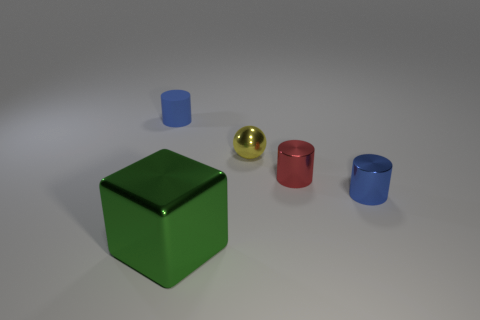

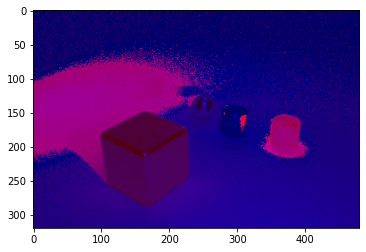

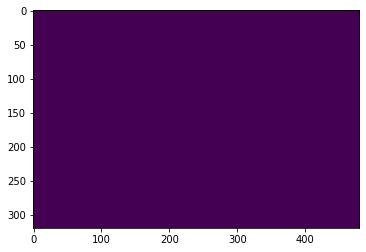

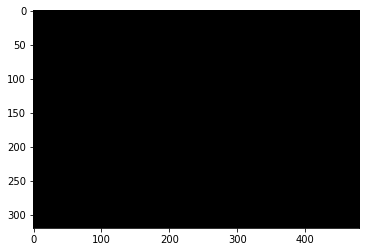

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [ ]:
files = get_files()
rights = 0
for f, ref in zip(files, ref_ans):
    #read image
    img = read_image(f, "HSV")
    w, h = img.size
    #create mask
    mask = create_mask(f, img)
    #masked = mask_image(mask, f) used in prev. version when only coords were used

    masked = color_mask(mask, w, h)
    masked_pix = masked.reshape(-1, 3)
    
    #add coords to array
    coordinate = perform_meshgrid(masked_pix, w, h)
    coordinate = pd.DataFrame(coordinate)

    # preserve the original xy coordinates for the future use
    coordinate_original = coordinate.drop(columns=[0,1,2]).copy()
    #cut background 
    coordinate = coordinate.loc[coordinate[1] != 0]

    # save the indices of valid objects
    valid_objects_idx = coordinate.index
    coordinate = pd.DataFrame(coordinate)
    #change color weight to 1.5x
    coordinate[[0, 1, 2]] = coordinate[[0, 1, 2]] * 1.5
    coordinate = coordinate.to_numpy()

    #calculate number of objects
    n_clusters = calculate_max_silhouette_score(coordinate)
    #final kmeans and plots result
    res = plot_res(n_clusters, coordinate)
    
    #compare to reference
    if (ref == res):
        print("RIGHT", f)
        rights += 1
    else:
        print("WRONG", f)


In [ ]:
#print (rights/len(files))
print("Accurecity of algorithm for this dataset is:", (rights/len(files))*100)

Accurecity of algorithm for this daataset is: 100.0


Debug section

In [ ]:
#debug
# # default value for background
# kmeans = KMeans(n_clusters=res, n_init=10, max_iter=300).fit(coordinate)

# coordinate_original['label'] = res+1
# # label each pixel with label
# coordinate_original['label'][valid_objects_idx] = kmeans.labels_

# for i in range(0,res):
#     obj_i = coordinate_original[coordinate_original['label']==i]
#     plt.scatter(obj_i.iloc[:,0] ,obj_i.iloc[:,1])
# plt.show()

NameError: name 'debud' is not defined

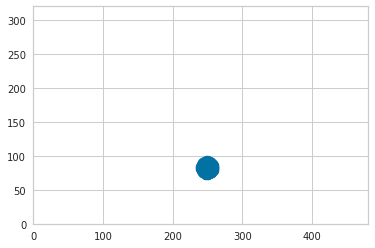

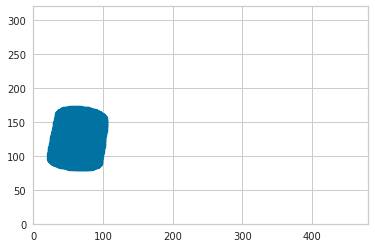

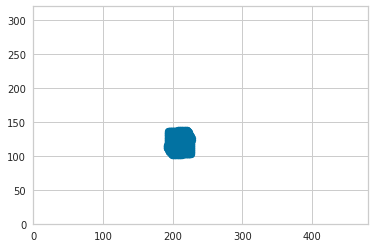

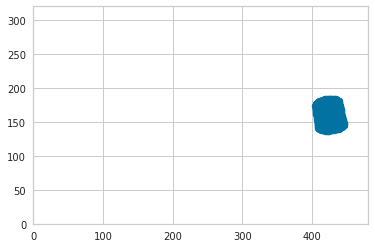

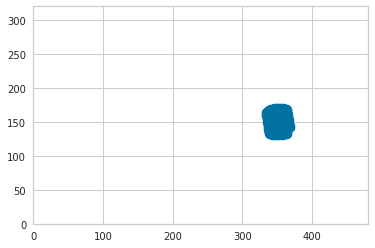

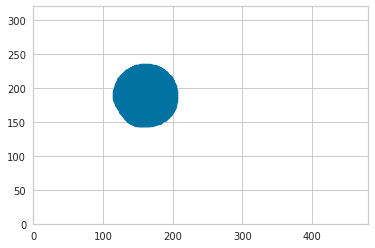

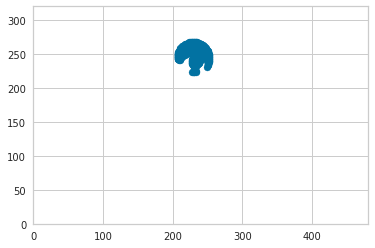

In [ ]:
#debug
# for i in range(0,res):
#     obj_i = coordinate_original[coordinate_original['label']==i]
#     plt.scatter(obj_i.iloc[:,0] ,obj_i.iloc[:,1])
#     plt.xlim([0,w])
#     plt.ylim([0,h])
#     plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e6ba99c3-270d-4e4a-a461-f55338b51c2d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>